In [1]:
import json

def resolveJson(path):
    file = open(path, "rb")
    fileJson = json.load(file)
    roadNodeList = fileJson["roadNodeList"]
    junctionNodeList = fileJson["junctionNodeList"]
    edgeList = fileJson["edgeList"]
    return (roadNodeList, junctionNodeList, edgeList)

path = r"F:/UnityProjects/MapManager/OpenDriveMaps/OutputGraph/inter3.json"
roadNodeList, junctionNodeList, edgeList = resolveJson(path)

In [2]:
print(roadNodeList)

[{'id': '0', 'startPos': {'x': -27.936172485351562, 'y': 0.0, 'z': -13.004464149475098}, 'endPos': {'x': -4.805009841918945, 'y': 0.0, 'z': -9.370169639587402}, 'leftLaneCnt': 2.0, 'rightLaneCnt': 2.0}, {'id': '1', 'startPos': {'x': 21.032175064086914, 'y': 0.0, 'z': -5.514986991882324}, 'endPos': {'x': 40.23626708984375, 'y': 0.0, 'z': -3.185275077819824}, 'leftLaneCnt': 2.0, 'rightLaneCnt': 2.0}, {'id': '2', 'startPos': {'x': 6.385845184326172, 'y': -3.814697265625e-06, 'z': 4.436821937561035}, 'endPos': {'x': -16.353391647338867, 'y': 0.0, 'z': 47.81688690185547}, 'leftLaneCnt': 2.0, 'rightLaneCnt': 2.0}, {'id': '3', 'startPos': {'x': -87.36721801757812, 'y': 0.0, 'z': 70.26502227783203}, 'endPos': {'x': -49.11911392211914, 'y': 0.0, 'z': 75.74848175048828}, 'leftLaneCnt': 3.0, 'rightLaneCnt': 3.0}, {'id': '4', 'startPos': {'x': -10.451847076416016, 'y': 0.0, 'z': 83.02132415771484}, 'endPos': {'x': 38.41130065917969, 'y': 0.0, 'z': 86.14994812011719}, 'leftLaneCnt': 3.0, 'rightLane

In [3]:
print(edgeList)

[{'rnIndex': 0, 'jnIndex': 10}, {'rnIndex': 1, 'jnIndex': 10}, {'rnIndex': 2, 'jnIndex': 10}, {'rnIndex': 6, 'jnIndex': 10}, {'rnIndex': 2, 'jnIndex': 11}, {'rnIndex': 3, 'jnIndex': 11}, {'rnIndex': 4, 'jnIndex': 11}, {'rnIndex': 5, 'jnIndex': 11}, {'rnIndex': 7, 'jnIndex': 12}, {'rnIndex': 8, 'jnIndex': 12}, {'rnIndex': 9, 'jnIndex': 12}, {'rnIndex': 1, 'jnIndex': 12}]


In [4]:
import networkx as nx
G = nx.Graph()#创建一个空图

In [16]:
G.clear()

In [5]:
#设置2种节点列表
roads = range(len(roadNodeList))
junctions = range(len(roadNodeList),len(roadNodeList)+len(junctionNodeList))
print(roads)
print(junctions)

range(0, 10)
range(10, 13)


In [6]:
#向图添加节点
G.add_nodes_from(roads, bipartite='road')
G.add_nodes_from(junctions, bipartite='junction')

In [7]:
#向节点添加属性
for i,rn in enumerate(roadNodeList):
    #节点属性
    G.nodes[i]['startPosX']=rn["startPos"]["x"]
    G.nodes[i]['startPosY']=rn["startPos"]["y"]
    G.nodes[i]['startPosZ']=rn["startPos"]["z"]
    G.nodes[i]['endPosX']=rn["endPos"]["x"]
    G.nodes[i]['endPosY']=rn["endPos"]["y"]
    G.nodes[i]['endPosZ']=rn["endPos"]["z"]
    G.nodes[i]['leftLaneCnt']=rn["leftLaneCnt"]
    G.nodes[i]['rightLaneCnt']=rn["rightLaneCnt"]

j = len(roadNodeList)
for x,jn in enumerate(junctionNodeList):
    G.nodes[j]['junctionType']=jn["junctionType"]
    j+=1
print(G.nodes[0])
print(G.nodes[len(roadNodeList)])

{'bipartite': 'road', 'startPosX': -27.936172485351562, 'startPosY': 0.0, 'startPosZ': -13.004464149475098, 'endPosX': -4.805009841918945, 'endPosY': 0.0, 'endPosZ': -9.370169639587402, 'leftLaneCnt': 2.0, 'rightLaneCnt': 2.0}
{'bipartite': 'junction', 'junctionType': 0}


In [8]:
for i,e in enumerate(edgeList):
    rnI = e["rnIndex"]
    jnI = e["jnIndex"]
    G.add_edge(rnI,jnI)
G.edges.data()

EdgeDataView([(0, 10, {}), (1, 10, {}), (1, 12, {}), (2, 10, {}), (2, 11, {}), (3, 11, {}), (4, 11, {}), (5, 11, {}), (6, 10, {}), (7, 12, {}), (8, 12, {}), (9, 12, {})])

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

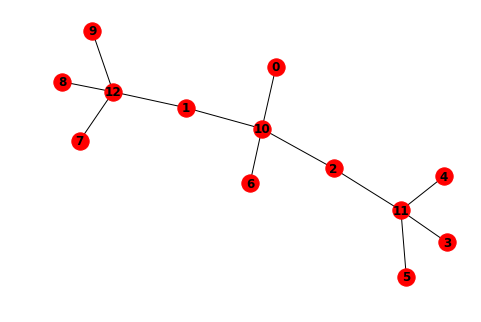

In [10]:
nx.draw(G,with_labels=True,font_weight='bold')

In [14]:
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(roads) )
pos.update( (n, (2, i+0.5)) for i, n in enumerate(junctions) )

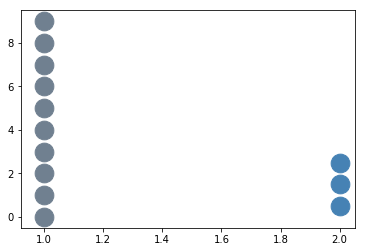

In [19]:
nx.draw_networkx_nodes(G,pos,nodelist=roads, node_color='slategray',node_size = 350, with_labels=False)
nx.draw_networkx_nodes(G,pos,nodelist=junctions, node_color='steelblue',node_size = 350, with_labels=False)

In [22]:
nx.write_gpickle(G,'inter3.gpickle')

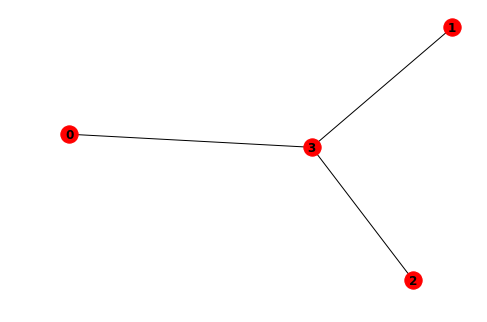

In [13]:
G2 = nx.read_gpickle('t_intersection.gpickle')
nx.draw(G2,with_labels=True,font_weight='bold')